In [1]:
from cue.line_jaxcompatible import predict as line_predict
from cue.continuum_jaxcompatible import predict as cont_predict

2024-11-29 16:44:50.994804: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 16:44:51.122114: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-29 16:44:51.252354: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-29 16:44:51.405948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-29 16:44:51.451466: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-29 16:44:51.713243: I tensorflow/core/platform/cpu_feature_gu

In [3]:
import jax.numpy as jnp
import numpy as np
#theta = np.random.rand(1000, 12)
#theta = jnp.array(theta)
par = jnp.array([[21.5, 14.85, 6.45, 3.15, 4.55, 0.7, 0.85, 49.58, 10**2.5, -0.85, -0.134, -0.134]])
lines = line_predict(1, theta=par).nn_predict()
cont = cont_predict(1, theta=par).nn_predict()

/home/annalena/cue/src/cue/line_jaxcompatible.py:227: RuntimeWarning: overflow encountered in power
  return self.wavelength, 10**self.nn_spectra


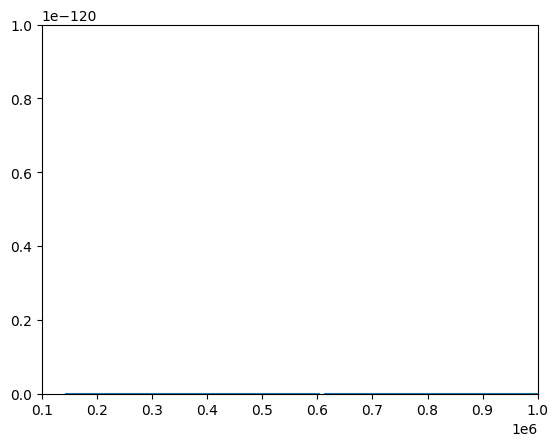

In [ ]:
import matplotlib.pyplot as plt
plt.plot(cont[0], cont[1])
plt.show()

In [ ]:
from jax.experimental import jax2tf
import jax.numpy as jnp
import tensorflow as tf
import jax

par = jnp.array([[21.5, 14.85, 6.45, 3.15, 4.55, 0.7, 0.85, 49.58, 10**2.5, -0.85, -0.134, -0.134]])

#par = tf.convert_to_tensor(par)
print(par.shape)

#@tf.function
def continuum_tf(particlenumber, theta):
    return cont_predict(particlenumber, theta=theta).nn_predict()

#def test_array(x):
#    return x

#x_tf = jax2tf.call_tf(test_array)(par)
#print(x_tf)
#print(x_tf.shape)
#print(x_tf[0,0])

#contclass = cont_predict(1, theta=np.array(par))
#print(contclass.nn_predict())
#continuum_tf_jit = jax.jit(continuum_tf, static_argnums=(0,))
config = {"particlenumber": 1}
wavelength_cont, continuum = jax2tf.call_tf(continuum_tf)(config["particlenumber"], par)

print(wavelength_cont)
print(continuum)

(1, 12)
[9.150e+02 9.250e+02 9.350e+02 ... 9.817e+07 9.908e+07 1.000e+08]
[ 0.  0.  0. ... inf inf inf]


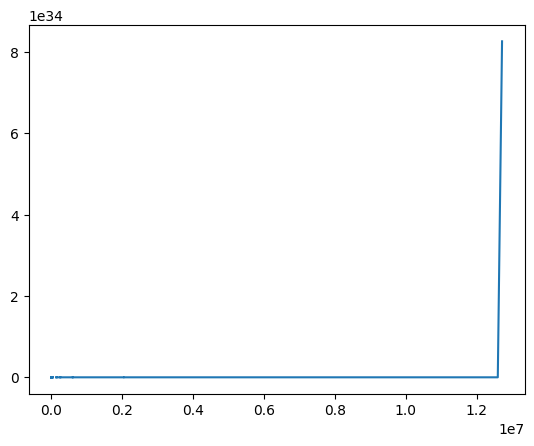

In [ ]:
import matplotlib.pyplot as plt
plt.plot(wavelength_cont, continuum)
plt.show()

In [ ]:
print(cont)

(array([9.150e+02, 9.250e+02, 9.350e+02, ..., 9.817e+07, 9.908e+07,
       1.000e+08]), Array([ 0.,  0.,  0., ..., inf, inf, inf], dtype=float32))


In [ ]:
print(lines)

(array([9.23150e+02, 9.26226e+02, 9.30748e+02, 9.37804e+02, 9.49743e+02,
       9.72537e+02, 1.02572e+03, 1.21567e+03, 1.40602e+03, 1.54819e+03,
       1.55077e+03, 1.64041e+03, 1.66081e+03, 1.66615e+03, 1.75000e+03,
       1.81456e+03, 1.85472e+03, 1.86279e+03, 1.88271e+03, 1.89203e+03,
       1.90668e+03, 1.90873e+03, 2.14277e+03, 2.32095e+03, 2.32350e+03,
       2.32469e+03, 2.32540e+03, 2.32693e+03, 2.32812e+03, 2.42428e+03,
       2.47100e+03, 2.66035e+03, 2.66915e+03, 2.79553e+03, 2.80271e+03,
       3.10918e+03, 3.34218e+03, 3.72163e+03, 3.72603e+03, 3.72881e+03,
       3.79790e+03, 3.83538e+03, 3.86876e+03, 3.88864e+03, 3.88905e+03,
       3.96747e+03, 3.97007e+03, 4.06860e+03, 4.07635e+03, 4.10173e+03,
       4.34046e+03, 4.36321e+03, 4.47150e+03, 4.62157e+03, 4.68568e+03,
       4.71126e+03, 4.72000e+03, 4.74012e+03, 4.86132e+03, 4.95891e+03,
       5.00684e+03, 5.19182e+03, 5.20026e+03, 5.51771e+03, 5.53787e+03,
       5.57734e+03, 5.75461e+03, 5.87566e+03, 6.30030e+03, 6.31

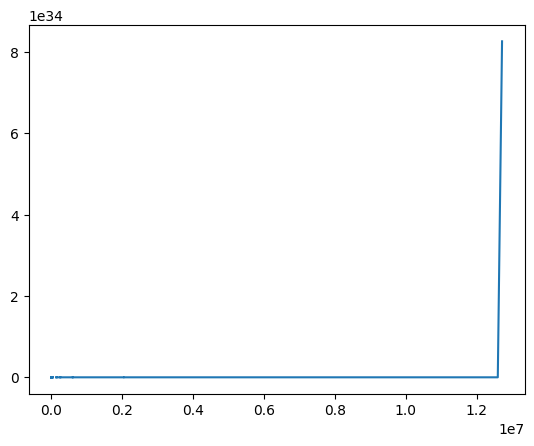

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(cont[0], cont[1], label='Continuum')
plt.show()